## Step 1 : Import required package


In [54]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
from datetime import timedelta
import seaborn as sns

In [2]:
data=pd.read_csv("/content/Daily_Public_Transport_Passenger_Boardings_By_Ticket_Type_20240513.csv")

In [3]:
data.head()

,Date,MyWay,Paper Ticket
0,01/07/2019,66215,4325
1,15/09/2023,63800,7349
2,28/12/2021,9994,1882
3,11/01/2023,43769,3991
4,11/09/2021,3810,685


In [65]:
data

,MyWay,Paper Ticket
Date,,
2019-07-01,66215,4325
2023-09-15,63800,7349
2021-12-28,9994,1882
2023-01-11,43769,3991
2021-09-11,3810,685
...,...,...
2023-01-19,46083,4622
2023-08-16,70115,6955
2022-01-10,21932,2315


In [9]:
data.describe()

,MyWay,Paper Ticket
count,1778.000000,1778.000000
mean,40985.889201,3744.153543
std,23275.162569,2153.562760
min,0.000000,13.000000
25%,17207.750000,1991.500000
50%,45079.500000,3374.500000
75%,60946.500000,5383.000000
max,88313.000000,10310.000000


In [64]:
data.ndim

2

In [10]:
data.dtypes

Date            object
MyWay            int64
Paper Ticket     int64
dtype: object

In [14]:
data.isnull().sum()

Date            0
MyWay           0
Paper Ticket    0
dtype: int64


* Convert object into datetime  
* Set date as an index

In [21]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'],  format='%d/%m/%Y')


In [22]:
data['Date']=pd.to_datetime(data['Date'])

In [24]:
#setting date column as an index inorder to make an timeseries plot
data.set_index("Date",inplace=True)

In [25]:
data.head()

,MyWay,Paper Ticket
Date,,
2019-07-01,66215,4325
2023-09-15,63800,7349
2021-12-28,9994,1882
2023-01-11,43769,3991
2021-09-11,3810,685


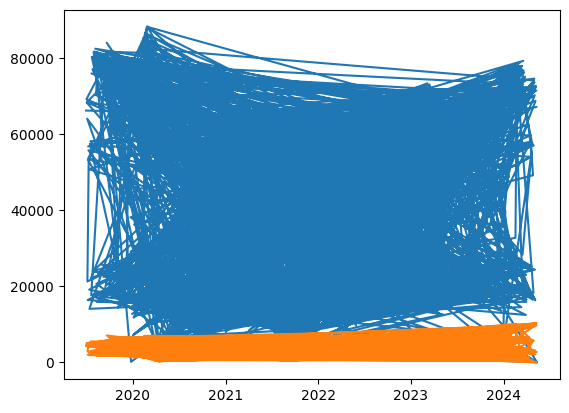

In [26]:
plt.plot(data)

## sort the data index and other index iorder to perform the decomposition of model

In [33]:
data_sorted = data.sort_values(by="Date",ascending=False)

In [36]:
data_sorted.head()

,MyWay,Paper Ticket
Date,,
2024-05-12,0,13
2024-05-11,54,2766
2024-05-10,67172,10310
2024-05-09,71487,9768
2024-05-08,72435,9850


In [40]:
data_sorted.head(3)

,MyWay,Paper Ticket
Date,,
2024-05-12,0,13
2024-05-11,54,2766
2024-05-10,67172,10310


In [42]:
data_sorted.tail(3)

,MyWay,Paper Ticket
Date,,
2019-07-03,68410,5086
2019-07-02,69181,4764
2019-07-01,66215,4325


## Getting only the last 1 year data
## the last updated data for this dataset is
Metadata Last Updated
May 13, 2024

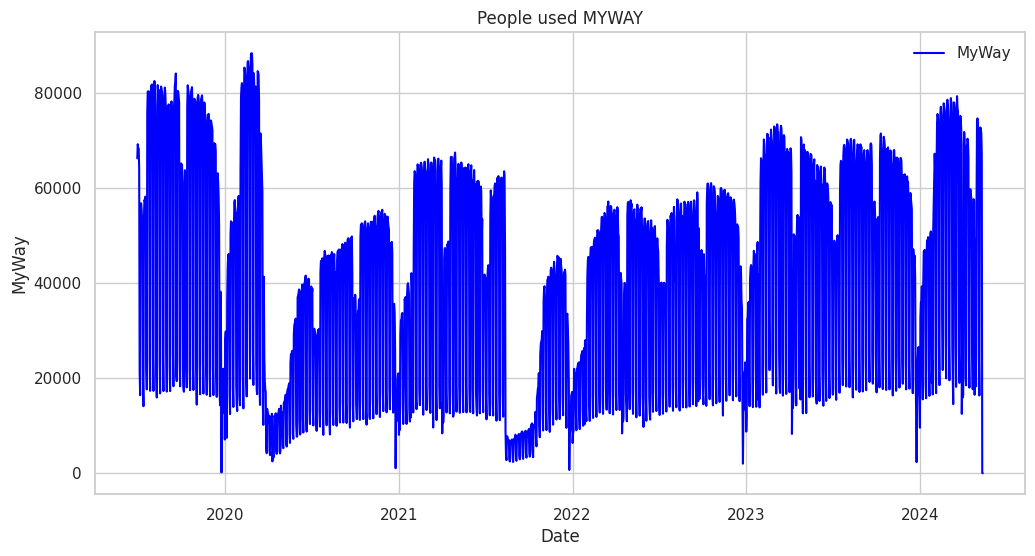

In [70]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=data_sorted, x='Date', y='MyWay', label='MyWay', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.title('People used MYWAY')

plt.show()

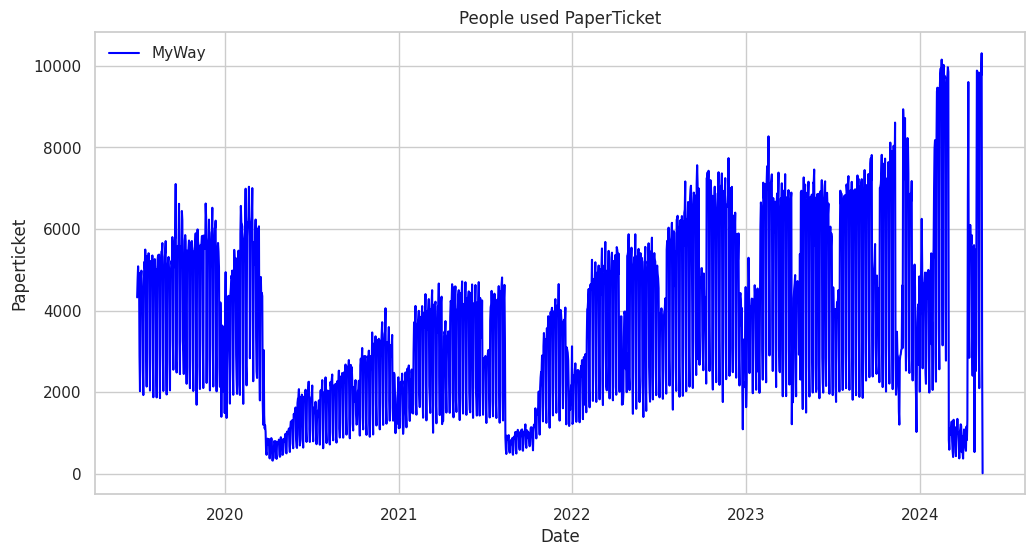

In [71]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=data_sorted, x='Date', y='Paper Ticket', label='MyWay', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Paperticket')
plt.title('People used PaperTicket')

plt.show()

Text(0.5, 1.0, 'People Used Paper Ticket')

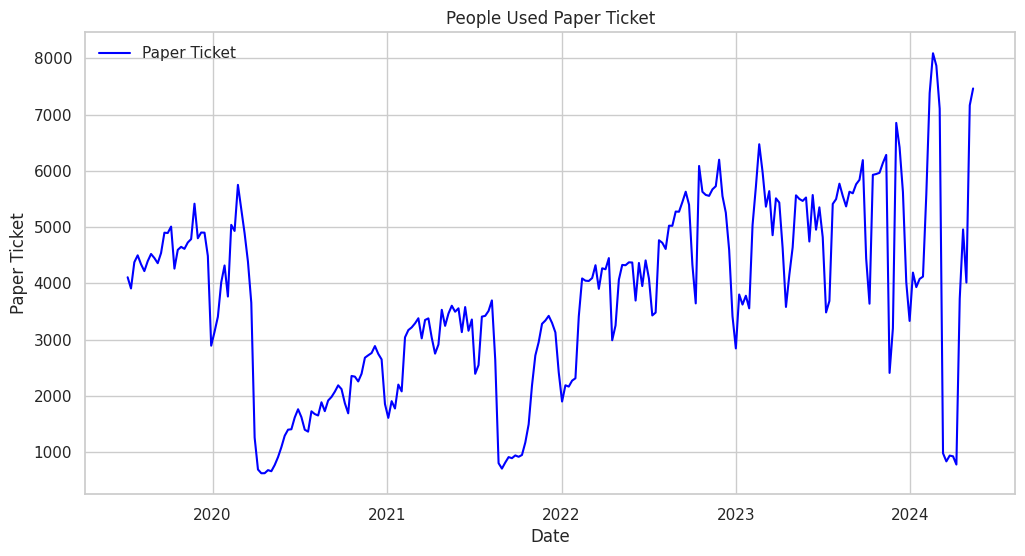

In [73]:
# Resample the DataFrame by month and calculate the mean
data_resampled = data_sorted.resample('W').mean()

# Plotting using seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=data_resampled, x=data_resampled.index, y='Paper Ticket', label='Paper Ticket', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Paper Ticket')
plt.title('People Used Paper Ticket')

#plt.show()
#data_resampled.head()

Text(0.5, 1.0, 'People Used MyWay')

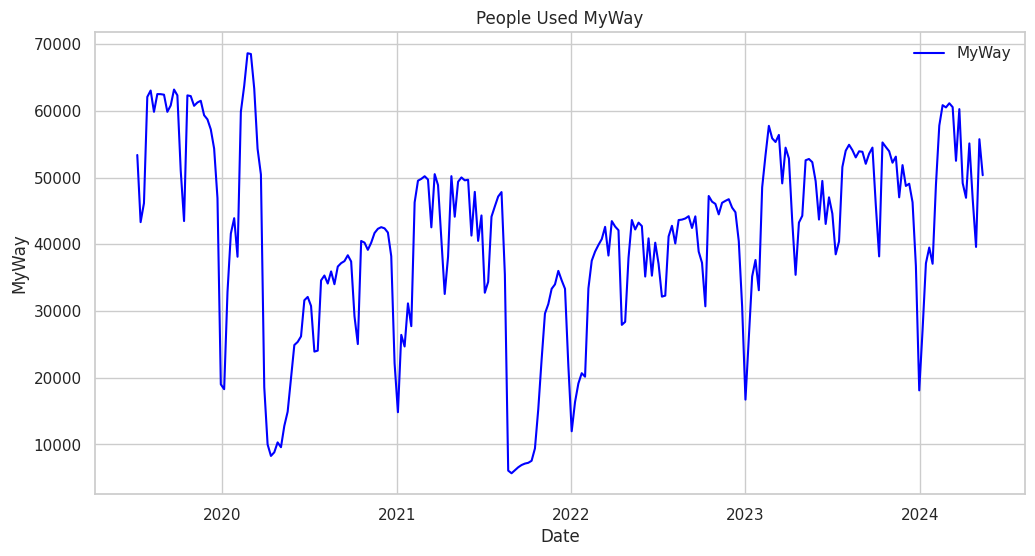

In [74]:
# Resample the DataFrame by month and calculate the mean
data_resampled = data_sorted.resample('W').mean()

# Plotting using seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=data_resampled, x=data_resampled.index, y='MyWay', label='MyWay', color='blue')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.title('People Used MyWay')

#plt.show()
#data_resampled.head()

## Finding the trend,seasonality,pattern and noise in the data

In [76]:
#decomposition method can be used to find the trend and seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose
last_year=data_sorted.asfreq('MS')
decompose_data=seasonal_decompose(last_year['MyWay'],model='additive')
decompose_data

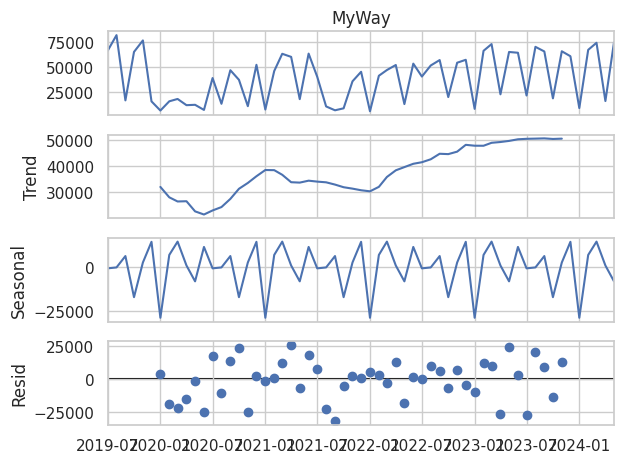

In [78]:
decompose_data.plot()
plt.show()

In [79]:
#decomposition method can be used to find the trend and seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose
last_year=data_sorted.asfreq('MS')
decompose_data=seasonal_decompose(last_year['Paper Ticket'],model='additive')
decompose_data

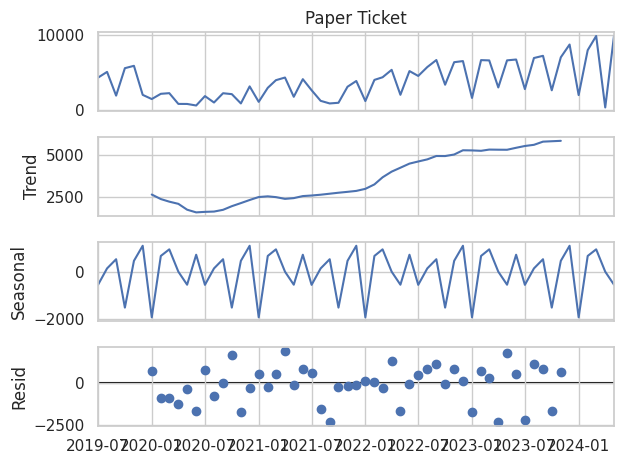

In [80]:
decompose_data.plot()
plt.show()

 # MULTIPLICATIVE DECOMPOSITION

In [81]:
#decomposition method can be used to find the trend and seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose
last_year=data_sorted.asfreq('MS')
decompose_data=seasonal_decompose(last_year['Paper Ticket'],model='Multiplicative')
decompose_data

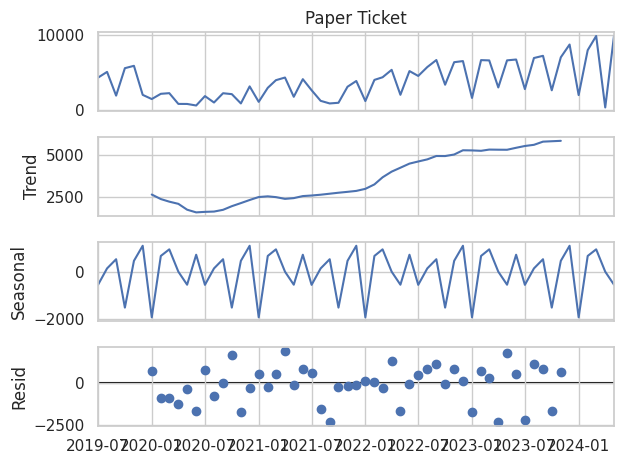

In [82]:
decompose_data.plot()
plt.show()

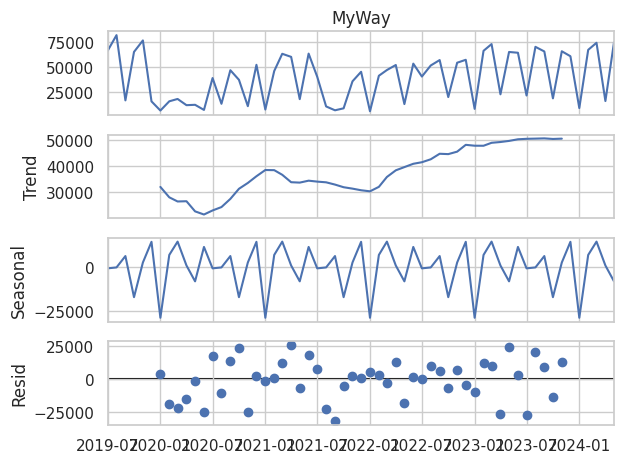

In [83]:
#decomposition method can be used to find the trend and seasonality in data
from statsmodels.tsa.seasonal import seasonal_decompose
last_year=data_sorted.asfreq('MS')
decompose_data=seasonal_decompose(last_year['MyWay'],model='Multiplicative')
decompose_data


decompose_data.plot()
plt.show()

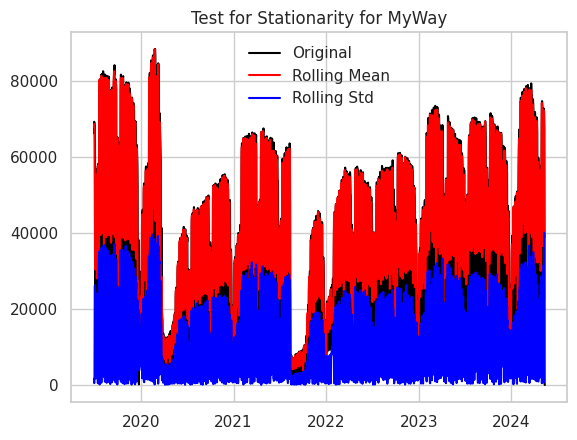

In [92]:
rollmean = data_sorted['MyWay'].rolling(window=3).mean()
rollstd = data_sorted['MyWay'].rolling(window=3).std()

# Plotting original time series, rolling mean, and rolling standard deviation
plt.plot(data_sorted['MyWay'], color='black', label='Original')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='blue', label='Rolling Std')
plt.legend()
plt.title("Test for Stationarity for MyWay")
plt.show()

IN ideal case the mean and the std should be constant but the data in myway is not constant so we are perfoming for the prdiction Task 2.

In [93]:
one_year = datetime.now() - timedelta(days=365)

# Filter the DataFrame to include only data from the last year
last_year= data_sorted[data_sorted.index>= one_year]

# Print the filtered DataFrame
print(last_year)

            MyWay  Paper Ticket
Date                           
2024-05-12      0            13
2024-05-11     54          2766
2024-05-10  67172         10310
2024-05-09  71487          9768
2024-05-08  72435          9850
...           ...           ...
2023-05-19  63487          6843
2023-05-18  66832          6753
2023-05-17  67084          6568
2023-05-16  67152          6781
2023-05-15  63689          6584

[364 rows x 2 columns]


In [104]:
rollmean = last_year['MyWay'].rolling(window=24).mean()
rollstd = last_year['MyWay'].rolling(window=24).std()

Text(0.5, 1.0, 'Test for Stationarity for MyWay')

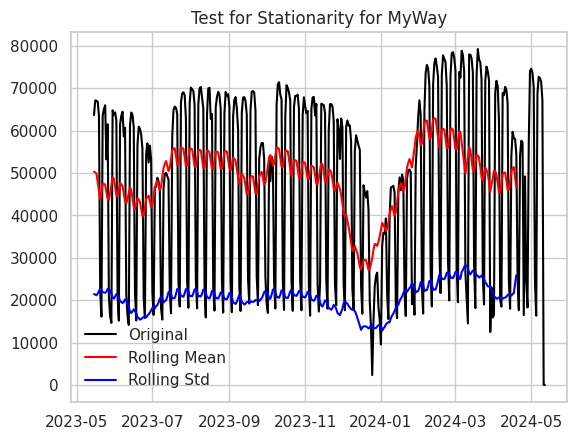

In [105]:


# Plotting original time series, rolling mean, and rolling standard deviation
plt.plot(last_year['MyWay'], color='black', label='Original')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='blue', label='Rolling Std')
plt.legend()
plt.title("Test for Stationarity for MyWay")
#plt.show()

In [106]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(last_year['MyWay'])

# Print the test statistic, p-value, and critical values
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -2.492266157200959
p-value: 0.11736741013251978
Critical Values:
   1%: -3.4493918438232525
   5%: -2.8699298018856574
   10%: -2.5712397066390458


if test statistics < p-value and the critical value < 0.5 then  the ho is rejected and there is no stationarity in data

In [117]:
last_year.head()

,MyWay,Paper Ticket
Date,,
2024-05-12,0,13
2024-05-11,54,2766
2024-05-10,67172,10310
2024-05-09,71487,9768
2024-05-08,72435,9850


In [120]:
new_data = last_year.copy()  # Create a copy of last_year (deep copy is created)
new_data.drop(columns=['Paper Ticket'], inplace=True)  # Drop the 'Paper Ticket' column from the copy


In [121]:
new_data

,MyWay
Date,
2024-05-12,0
2024-05-11,54
2024-05-10,67172
2024-05-09,71487
2024-05-08,72435
...,...
2023-05-19,63487
2023-05-18,66832
2023-05-17,67084


In [138]:
new_data.isnull().sum()

MyWay    0
dtype: int64

perform the differncing  and Transformation techniques inorder make them statioanry

In [163]:
def test_stationarity(df):
    # Determing rolling statistics
    df.dropna(inplace=True)
    rolmean = df.rolling(window=12, center=False).mean()
    rolstd = df.rolling(window=12, center=False).std()

    # Plot rolling statistics
    orig = plt.plot(df, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

  # Perform Dickey-Fuller test
   # print('Results of Dickey-Fuller Test for',)
    #dftest = adfuller(df, autolag='AIC')
   # dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
   # for key, value in dftest[4].items():
    #    dfoutput['Critical Value (%s)' % key] = value
   # print(dfoutput) """


In [164]:
#log transformation
ts_log = np.log(new_data)

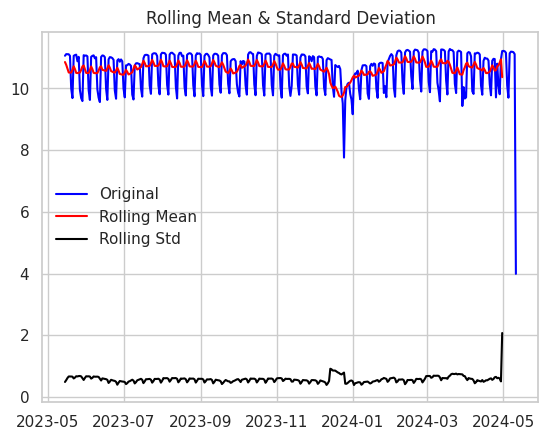

In [165]:
test_stationarity(ts_log)

In [168]:
#log differencing
ts_log = np.log(new_data)
ts_log_diff = ts_log - ts_log.shift(1)
ts_log_diff

,MyWay
Date,
2024-05-12,NaN
2024-05-11,inf
2024-05-10,7.126028
2024-05-09,0.062259
2024-05-08,0.013174
...,...
2023-05-19,1.063527
2023-05-18,0.051347
2023-05-17,0.003764


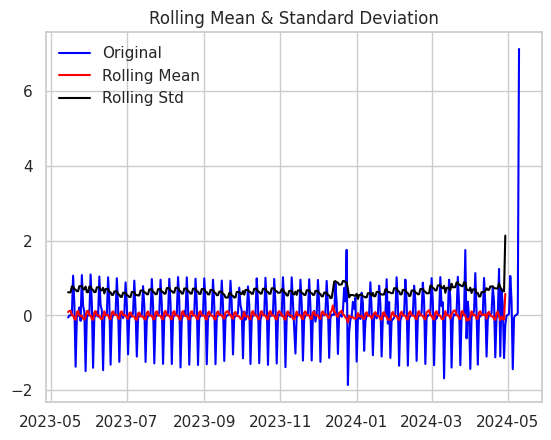

In [169]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)




In [170]:
movingAverage = ts_log.rolling(window=15).mean()
movingSTD = ts_log.rolling(window=15).std()

In [171]:
# Get the difference between the moving average and the actual number of passengers
ts_log_mv_diff = ts_log - movingAverage
ts_log_mv_diff.head(12)
#Remove Nan Values
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

,MyWay
Date,
2024-04-27,-0.253282
2024-04-26,-0.001992
2024-04-25,-1.000934
2024-04-24,0.257750
2024-04-23,0.279600
2024-04-22,0.236411
2024-04-21,-0.792531
2024-04-20,-0.462062
2024-04-19,0.250194


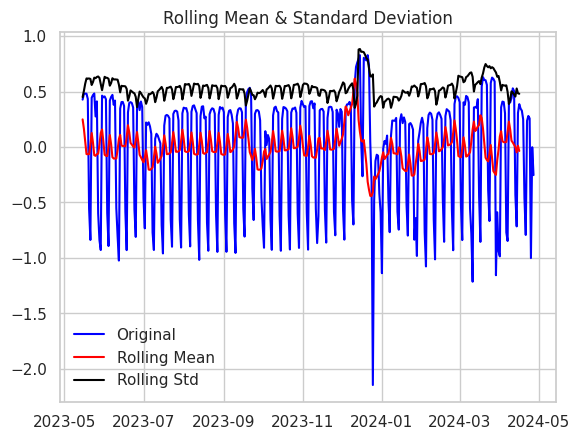

In [172]:
test_stationarity(ts_log_mv_diff)

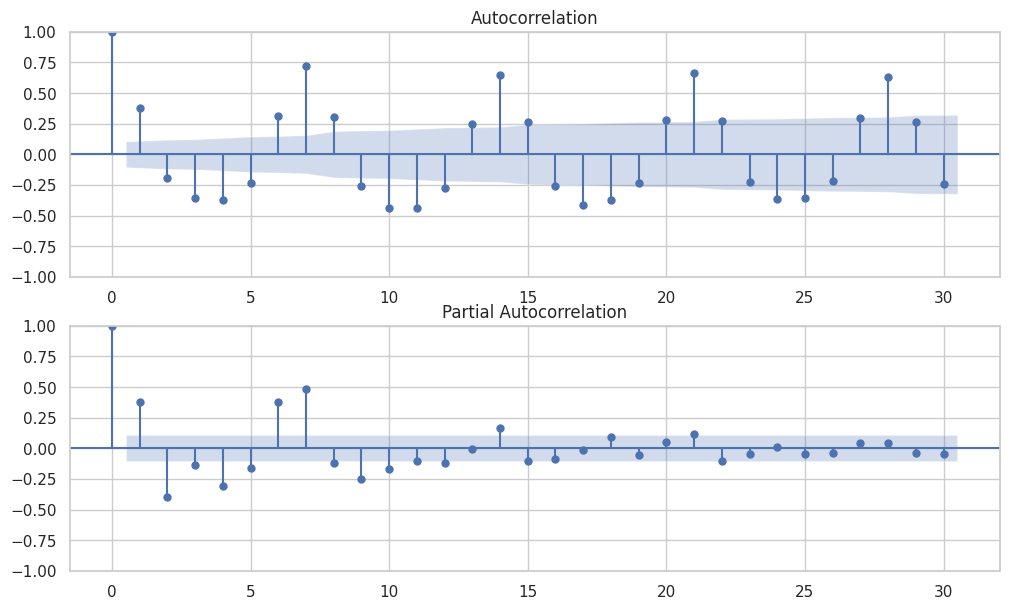

In [173]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (12,7))
plt.subplot(211)
plot_acf(ts_log_mv_diff, ax=plt.gca(),lags=30)
plt.subplot(212)
plot_pacf(ts_log_mv_diff, ax=plt.gca(),lags=30)
plt.show()

In [175]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')
# order (p,d,q)
model = ARIMA(ts_log_diff, order = (1, 1, 1))
results_ARIMA = model.fit()

In [ ]:
# Calculate RMSE
rmse = np.sqrt(np.mean((results_ARIMA.fittedvalues - ts_log_diff)**2))

# Plot the original time series and fitted values
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')



In [ ]:
# Drop rows containing NaN values
ts_log_diff.dropna(inplace=True)

# Fit the ARIMA model
model = ARIMA(ts_log_diff, order=(2, 1, 0))
results_ARIMA_final = model.fit()

# Plot the original time series and fitted values
plt.plot(ts_log_diff)
plt.plot(results_ARIMA_final.fittedvalues, color='red')


Forecast for the next 7 days:
364      4173.846153
365    -59781.356145
366   -131575.973296
367   -245106.154425
368   -383928.570693
369   -526186.456327
370   -680654.228105
Name: predicted_mean, dtype: float64


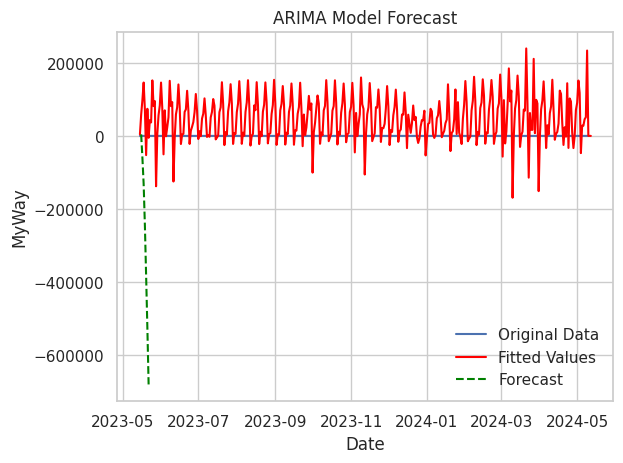

In [181]:
# Forecast for the next 7 days
forecast_values = results_ARIMA_final.forecast(steps=7)

# Print the forecast values
print("Forecast for the next 7 days:")
print(forecast_values)

# Plot the original time series, fitted values, and forecast
plt.plot(ts_log_diff, label='Original Data')
plt.plot(results_ARIMA_final.fittedvalues, color='red', label='Fitted Values')
forecast_index = pd.date_range(start=ts_log_diff.index[-1], periods=8, freq='D')[1:]  # Generate index for forecasted values
plt.plot(forecast_index, forecast_values, color='green', linestyle='--', label='Forecast')
plt.xlabel('Date')
plt.ylabel('MyWay')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()
